In [1]:
import numpy as np
import matplotlib.pyplot as plt
import CosmologyLibrary as cslb
import cosmolopy.perturbation as cseu
import cosmolopy as csp
import sys

print(sys.path)
sys.path.append("~/Downloads/CAMB-May2016/pycamb")
sys.path.append("~/Downloads/CAMB-May2016")
import matplotlib.gridspec as gridspec

['', '/home/sujatha/anaconda2/lib/python27.zip', '/home/sujatha/anaconda2/lib/python2.7', '/home/sujatha/anaconda2/lib/python2.7/plat-linux2', '/home/sujatha/anaconda2/lib/python2.7/lib-tk', '/home/sujatha/anaconda2/lib/python2.7/lib-old', '/home/sujatha/anaconda2/lib/python2.7/lib-dynload', '/home/sujatha/.local/lib/python2.7/site-packages', '/home/sujatha/anaconda2/lib/python2.7/site-packages', '/home/sujatha/anaconda2/lib/python2.7/site-packages/Sphinx-1.5.6-py2.7.egg', '/home/sujatha/anaconda2/lib/python2.7/site-packages/setuptools-27.2.0-py2.7.egg', '/home/sujatha/anaconda2/lib/python2.7/site-packages/IPython/extensions', '/home/sujatha/.ipython']


### Initialising Cosmological Parameters 

In [10]:
params = cslb.cosmology()
Omega_matter = params.Omega_matter
Omega_lambda = params.Omega_lambda
print Omega_matter,Omega_lambda
#cosmology = csp.parameters.WMAP7_BAO_H0_mean(flat=False, extras=True)
cosmology = {'tau': 0.087, 'omega_n_0': 0.0, 'sigma_8': 0.8, 'h': 0.7, 'N_nu': 0, 'omega_lambda_0': 0.7, 'n': 0.963, 'Y_He': 0.24, 'z_reion': 10.4, 'omega_b_0': 0.045, 't_0': 13.75, 'omega_M_0': 0.3}

0.3 0.7


## Transfer Function

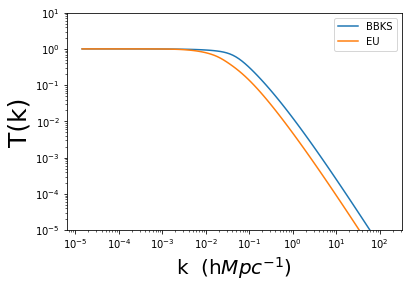

In [11]:
k = np.logspace(-5,2,100)
h=0.7
kh=k/h
T_bbks = cslb.BBKS_tf(kh)
T_eu = cseu.transfer_function_EH(k, **cosmology)
#plt.plot(k,T_bbks,label='BBKS')
#plt.plot(k/0.7,T_eu[0],label='EU')
plt.loglog(kh,T_bbks,label='BBKS')
plt.loglog(kh,T_eu[0],label='EU')
plt.xlabel('k  (h$Mpc^{-1}$)',fontsize=20)
plt.ylabel('T(k)',fontsize=25)
plt.ylim([1e-5,10])
#plt.xscale('log')
plt.legend()
plt.show()
plt.clf()

## Power Spectrum

In [1]:
fig=plt.figure(figsize=(5,5), dpi= 100, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(3, 1)
ax1 = plt.subplot(gs[:-1,:])
PS_bbks = cslb.PS(kh,0.0,T_bbks)
PS_eu = cslb.PS(kh,0.0,T_eu[0])
ax1.loglog(kh,PS_bbks,label='BBKS')
ax1.loglog(kh,PS_eu,label='EU')
plt.setp(ax1.get_xticklabels(), visible=True)
ax1.set_ylabel('P(k)  ($h^{-1}Mpc)^3$')
plt.legend()
ax2 = plt.subplot(gs[2, :])
ax2.semilogx(kh,PS_bbks/PS_eu)
gs.update(hspace=0, wspace=0)
ax2.set_xlabel('k  (h$Mpc^{-1}$)')
ax2.set_ylabel('$P_{bbks}/P_{EHu}$')
#ax1.xaxis.set_tick_params(size=10)
#ax1.patch.set_facecolor('None')
#ax2.patch.set_facecolor('None')
ax1.tick_params(direction='in',which='both')
plt.show()

NameError: name 'plt' is not defined